In [10]:
#installing lightGBM
import sys
!conda install -c conda-forge lightgbm --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbuser/anaconda3_420:

The following NEW packages will be INSTALLED:

    _libgcc_mutex: 0.1-main                         
    lightgbm:      2.2.0-py35hfc679d8_0  conda-forge
    readline:      7.0-ha6073c6_4                   
    tbb:           2019.3-h2d50403_0     conda-forge
    tbb4py:        2019.1-py35h2d50403_0 conda-forge

The following packages will be UPDATED:

    conda:         4.3.31-py35_0                     --> 4.5.11-py35_0        conda-forge
    pycosat:       0.6.1-py35_1                      --> 0.6.3-py35h470a237_1 conda-forge

The following packages will be SUPERSEDED by a higher-priority channel:

    conda-env:     2.6.0-h36134e3_1                  --> 2.6.0-1              conda-forge

_libgcc_mutex- 100% |################################| Time: 0:00:00   2.60 MB/s
conda-env-2.6. 100% |################################| Time: 0:00:00   

In [1]:
#libraries
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values   #only consider gender and EstimatedSalary variables
y = dataset.iloc[:, 4].values        #only takes the Purchased
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [49]:
len(dataset)

400

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Feature Scaling
# We need to convert our training data into LightGBM dataset format
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Trainig the model GBM

In [20]:
# classification problem

#Accuracy of your model totally depends on the values you provide to parameters.
#model parametrs are given in a dictionary

d_train = lgb.Dataset(x_train, label=y_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'                 #GB
params['objective'] = 'binary'                   #classification problem
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10                         #10 for small data sets

clf = lgb.train(params, d_train, 100)

# Model prediction

In [34]:
# converted probabilities to binary prediction keeping threshold=0.5

#Prediction
y_pred=clf.predict(x_test)
y_pred_f = np.empty([100])
#convert into binary values
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred_f[i]=1
    else:  
       y_pred_f[i]=0


# Confusion matrix to eveluate the model performance

In [36]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_f)

array([[68,  0],
       [24,  8]])

In [39]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_f,y_test)
print("accu:", accuracy * 100)

#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_pred_f,y_test)
print("prec:", precision * 100)

#Recall
from sklearn.metrics import recall_score
recall = recall_score(y_pred_f,y_test)
print("rec:", recall * 100)

accu: 76.0
prec: 25.0
rec: 100.0


# ROC CURVE

In [46]:
from sklearn.metrics import roc_auc_score
#ROC CURVE OVER THE PROBABILITIES
roc_auc_score(y_test, y_pred_f)

0.625

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

Text(0,0.5,'True Positive Rate')

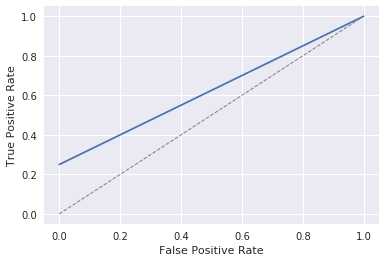

In [48]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_f)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')